In [2]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import warnings

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('itsm.csv')

In [4]:
data.head()

CI_Name          CI_Cat              CI_Subcat        WBS Incident_ID  \
0  SUB000508  subapplication  Web Based Application  WBS000162   IM0000004   
1  WBA000124     application  Web Based Application  WBS000088   IM0000005   
2  DTA000024     application    Desktop Application  WBS000092   IM0000006   
3  WBA000124     application  Web Based Application  WBS000088   IM0000011   
4  WBA000124     application  Web Based Application  WBS000088   IM0000012   

   Status Impact Urgency  Priority  number_cnt                 Category  \
0  Closed      4       4       4.0    0.601292                 incident   
1  Closed      3       3       3.0    0.415050                 incident   
2  Closed     NS       3       NaN    0.517551  request for information   
3  Closed      4       4       4.0    0.642927                 incident   
4  Closed      4       4       4.0    0.345258                 incident   

   KB_number Alert_Status  No_of_Reassignments         Open_Time  \
0  KM0000553       closed                 26.0  05-02-2012 13:32   
1  KM0000611       closed                 33.0  12-03-2012 15:44   
2  KM0000339       closed                  3.0  29-03-2012 12:36   
3  KM0000611       closed                 13.0  17-07-2012 11:49   
4  KM0000611       closed                  2.0  10-08-2012 11:01   

        Reopen_Time     Resolved_Time        Close_Time Handle_Time_hrs  \
0               NaN  04-11-2013 13:50  04-11-2013 13:51  3,87,16,91,111   
1  02-12-2013 12:31  02-12-2013 12:36  02-12-2013 12:36  4,35,47,86,389   
2               NaN  13-01-2014 15:12  13-01-2014 15:13  4,84,31,19,444   
3               NaN  14-11-2013 09:31  14-11-2013 09:31  4,32,18,33,333   
4               NaN  08-11-2013 13:55  08-11-2013 13:55  3,38,39,03,333   

                   Closure_Code  No_of_Related_Interactions  \
0                         Other                         1.0   
1                      Software                         1.0   
2  No error - works as designed                         1.0   
3                Operator error                         1.0   
4                         Other                         1.0   

  Related_Interaction  No_of_Related_Incidents  No_of_Related_Changes  \
0           SD0000007                      2.0                    NaN   
1           SD0000011                      1.0                    NaN   
2           SD0000017                      NaN                    NaN   
3           SD0000025                      NaN                    NaN   
4           SD0000029                      NaN                    NaN   

  Related_Change  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [9]:
data.describe()

Priority    number_cnt  No_of_Reassignments  \
count  45226.000000  46606.000000         46605.000000   
mean       4.215805      0.499658             1.131831   
std        0.705624      0.288634             2.269774   
min        1.000000      0.000023             0.000000   
25%        4.000000      0.248213             0.000000   
50%        4.000000      0.500269             0.000000   
75%        5.000000      0.749094             2.000000   
max        5.000000      0.999997            46.000000   

       No_of_Related_Interactions  No_of_Related_Incidents  \
count                46492.000000              1222.000000   
mean                     1.149897                 1.669394   
std                      2.556338                 3.339687   
min                      1.000000                 1.000000   
25%                      1.000000                 1.000000   
50%                      1.000000                 1.000000   
75%                      1.000000                 1.000000   
max                    370.000000                63.000000   

       No_of_Related_Changes  
count             560.000000  
mean                1.058929  
std                 0.403596  
min                 1.000000  
25%                 1.000000  
50%                 1.000000  
75%                 1.000000  
max                 9.000000

In [10]:
data.describe(include=object)

CI_Name       CI_Cat                 CI_Subcat        WBS  \
count       46606        46495                     46495      46606   
unique       3019           12                        64        274   
top     SUB000456  application  Server Based Application  WBS000073   
freq         3050        32900                     18811      13342   

       Incident_ID  Status Impact  Urgency  Category  KB_number Alert_Status  \
count        46606   46606  46606    46606     46606      46606        46606   
unique       46606       2      6       11         4       1825            1   
top      IM0015050  Closed      4        4  incident  KM0001106       closed   
freq             1   46597  22556    15526     37748       1106        46606   

               Open_Time       Reopen_Time     Resolved_Time  \
count              46606              2284             44826   
unique             34636              2244             33627   
top     24-03-2014 08:54  03-03-2014 14:41  10-10-2013 12:53   
freq                   7                 2                 7   

              Close_Time Handle_Time_hrs Closure_Code Related_Interaction  \
count              46606           46605        46146               46606   
unique             34528           30638           14               43060   
top     02-10-2013 15:20               0        Other         #MULTIVALUE   
freq                  21             236        16470                3434   

       Related_Change  
count             560  
unique            232  
top         C00003013  
freq              110

In [11]:
def list_null(df):
    """
    Prints the Null count, Null-Percentage and Datatype alongside the name of the dataframe columns.
    
    >>>> list_null(data)
    
    Columns   Null Count  Percent  DataType
    -------  ----------   -------    -------- 

    CI_Cat      111	null	 0.24%		object
    CI_Subcat   111	null	 0.24%		object
    Priority   1380	null	 2.96%		float64
                 :
                 :
                 :
    """
    print('Columns \t\t\t Null Count \t Percent\tDataType')
    print('------- \t\t\t ---------- \t -------\t-------- \n')
    for i in data.columns:
        null = data[i].isnull().sum()
        percent = null/data.shape[0]
        if null!=0:
            print("{:23} \t{:<}\t{}\t {:.2%}\t\t{}".format(i,null,'null',percent,data[i].dtype))

In [12]:
list_null(data)
    

Columns 			 Null Count 	 Percent	DataType
------- 			 ---------- 	 -------	-------- 

CI_Cat                  	111	null	 0.24%		object
CI_Subcat               	111	null	 0.24%		object
Priority                	1380	null	 2.96%		float64
No_of_Reassignments     	1	null	 0.00%		float64
Reopen_Time             	44322	null	 95.10%		object
Resolved_Time           	1780	null	 3.82%		object
Handle_Time_hrs         	1	null	 0.00%		object
Closure_Code            	460	null	 0.99%		object
No_of_Related_Interactions 	114	null	 0.24%		float64
No_of_Related_Incidents 	45384	null	 97.38%		float64
No_of_Related_Changes   	46046	null	 98.80%		float64
Related_Change          	46046	null	 98.80%		object


In [13]:
data[data.CI_Cat.isnull()]

CI_Name CI_Cat CI_Subcat        WBS Incident_ID  Status Impact  \
316    OVR000033    NaN       NaN  WBS000118   IM0000385  Closed      5   
538    OVR000078    NaN       NaN  WBS000187   IM0000625  Closed      3   
593    OVR000072    NaN       NaN  WBS000187   IM0000682  Closed      3   
670    OVR000099    NaN       NaN  WBS000135   IM0000761  Closed      5   
1128   OVR000033    NaN       NaN  WBS000118   IM0001227  Closed      2   
1173   OVR000033    NaN       NaN  WBS000118   IM0001273  Closed      5   
1207   OVR000033    NaN       NaN  WBS000118   IM0001307  Closed      5   
2609   OVR000047    NaN       NaN  WBS000141   IM0002725  Closed      5   
3152   OVR000089    NaN       NaN  WBS000016   IM0003271  Closed      3   
3872   OVR000081    NaN       NaN  WBS000201   IM0003994  Closed      5   
3898   OVR000059    NaN       NaN  WBS000063   IM0004021  Closed      4   
4911   OVR000015    NaN       NaN  WBS000204   IM0005043  Closed     NS   
4980   OVR000059    NaN       NaN  WBS000063   IM0005113  Closed      4   
5640   OVR000060    NaN       NaN  WBS000016   IM0005782  Closed     NS   
5765   OVR000015    NaN       NaN  WBS000204   IM0005909  Closed      3   
5989   OVR000033    NaN       NaN  WBS000118   IM0006135  Closed      5   
6091   OVR000014    NaN       NaN  WBS000204   IM0006238  Closed      3   
6098   OVR000033    NaN       NaN  WBS000118   IM0006245  Closed      5   
6874   OVR000016    NaN       NaN  WBS000097   IM0007029  Closed      4   
6941   OVR000015    NaN       NaN  WBS000204   IM0007098  Closed     NS   
7210   OVR000014    NaN       NaN  WBS000204   IM0007367  Closed      3   
7294   OVR000033    NaN       NaN  WBS000118   IM0007451  Closed      5   
7297   OVR000033    NaN       NaN  WBS000118   IM0007454  Closed      5   
7881   OVR000033    NaN       NaN  WBS000118   IM0008039  Closed      5   
11710  OVR000082    NaN       NaN  WBS000016   IM0011890  Closed      3   
12041  OVR000033    NaN       NaN  WBS000118   IM0012225  Closed      5   
12178  OVR000070    NaN       NaN  WBS000118   IM0012363  Closed      5   
12318  OVR000059    NaN       NaN  WBS000002   IM0012504  Closed      4   
12504  OVR000025    NaN       NaN  WBS000118   IM0012691  Closed      5   
12719  OVR000035    NaN       NaN  WBS000284   IM0012906  Closed      2   
13141  OVR000025    NaN       NaN  WBS000118   IM0013333  Closed      4   
13162  OVR000025    NaN       NaN  WBS000118   IM0013354  Closed      4   
13212  OVR000033    NaN       NaN  WBS000118   IM0013404  Closed      5   
13307  OVR000059    NaN       NaN  WBS000002   IM0013499  Closed      4   
13311  OVR000025    NaN       NaN  WBS000118   IM0013504  Closed      4   
13440  OVR000025    NaN       NaN  WBS000118   IM0013635  Closed      4   
13526  OVR000025    NaN       NaN  WBS000118   IM0013721  Closed      4   
13851  OVR000025    NaN       NaN  WBS000118   IM0014048  Closed      4   
15605  OVR000010    NaN       NaN  WBS000097   IM0015816  Closed      4   
15992  OVR000035    NaN       NaN  WBS000284   IM0016205  Closed      2   
16073  OVR000093    NaN       NaN  WBS000002   IM0016287  Closed      5   
16244  OVR000033    NaN       NaN  WBS000118   IM0016458  Closed      5   
16268  OVR000033    NaN       NaN  WBS000118   IM0016482  Closed      2   
16276  OVR000033    NaN       NaN  WBS000118   IM0016490  Closed      3   
16277  OVR000033    NaN       NaN  WBS000118   IM0016491  Closed      5   
16452  OVR000033    NaN       NaN  WBS000118   IM0016666  Closed      2   
16493  OVR000033    NaN       NaN  WBS000118   IM0016707  Closed      5   
17383  OVR000033    NaN       NaN  WBS000118   IM0017599  Closed      5   
17623  OVR000025    NaN       NaN  WBS000118   IM0017841  Closed      4   
17753  OVR000033    NaN       NaN  WBS000118   IM0017974  Closed      5   
17789  OVR000025    NaN       NaN  WBS000118   IM0018010  Closed      4   
18166  OVR000033    NaN       NaN  WBS000118   IM0018390  Closed      5   
18366  OVR000043    NaN       NaN 

In [5]:
data.CI_Cat.fillna('application',inplace=True)
data.CI_Subcat.fillna('One View Reporting',inplace=True)

In [15]:
data[data.No_of_Reassignments.isna()]

CI_Name       CI_Cat                 CI_Subcat        WBS  \
24520  SBA000759  application  Server Based Application  WBS000296   

      Incident_ID  Status Impact Urgency  Priority  number_cnt  \
24520   IM0024778  Closed      5       5       5.0    0.900155   

                 Category  KB_number Alert_Status  No_of_Reassignments  \
24520  request for change  KM0001032       closed                  NaN   

              Open_Time Reopen_Time     Resolved_Time        Close_Time  \
24520  31-12-2013 11:53         NaN  07-01-2014 14:46  07-01-2014 14:46   

      Handle_Time_hrs Closure_Code  No_of_Related_Interactions  \
24520             NaN     Software                         1.0   

      Related_Interaction  No_of_Related_Incidents  No_of_Related_Changes  \
24520           SD0073944                      NaN                    NaN   

      Related_Change  
24520            NaN

In [16]:
data.No_of_Reassignments.fillna(0,inplace=True)

In [17]:
data[data.Priority.isna()]

CI_Name                CI_Cat                 CI_Subcat        WBS  \
2      DTA000024           application       Desktop Application  WBS000092   
8      WBA000124           application     Web Based Application  WBS000088   
103    SBA000782           application  Server Based Application  WBS000043   
147    SBA000782           application  Server Based Application  WBS000043   
152    SBA000782           application  Server Based Application  WBS000043   
166    SBA000782           application  Server Based Application  WBS000043   
183    SBA000607           application  Server Based Application  WBS000263   
226    SBA000782           application  Server Based Application  WBS000043   
237    STA000033           application      Standard Application  WBS000066   
277    SBA000759           application  Server Based Application  WBS000296   
311    SBA000765           application  Server Based Application  WBS000300   
333    SBA000805           application  Server Based Application  WBS000016   
341    SUB000508        subapplication     Web Based Application  WBS000162   
366    SBA000538           application  Server Based Application  WBS000300   
403    SUB000508        subapplication     Web Based Application  WBS000162   
528    CBA000014           application  Client Based Application  WBS000073   
539    SBA000777           application  Server Based Application  WBS000312   
600    SBA000805           application  Server Based Application  WBS000016   
634    DTA000616           application       Desktop Application  WBS000092   
661    WBA000124           application     Web Based Application  WBS000088   
758    SBA000122           application  Server Based Application  WBS000018   
772    SBA000028           application  Server Based Application  WBS000030   
845    SBA000805           application  Server Based Application  WBS000016   
861    SBA000805           application  Server Based Application  WBS000016   
870    CBA000014           application  Client Based Application  WBS000073   
888    WBA000116           application     Web Based Application  WBS000066   
925    SBA000311           application  Server Based Application  WBS000054   
945    DTA000016           application       Desktop Application  WBS000096   
969    ADB000010              database                  Database  WBS000239   
970    ADB000010              database                  Database  WBS000239   
971    SUB000513        subapplication     Web Based Application  WBS000012   
998    SBA000045           application  Server Based Application  WBS000170   
1030   DTA000045           application       Desktop Application  WBS000089   
1056   CBD000901              computer            Banking Device  WBS000146   
1075   SBA000172           application  Server Based Application  WBS000014   
1090   SUB000286        subapplication  Server Based Application  WBS000054   
1159   SBA000805           application  Server Based Application  WBS000016   
1176   WBA000148           application     Web Based Application  WBS000172   
1178   SBA000025           application  Server Based Application  WBS000006   
1184   SBA000017           application  Server Based Application  WBS000099   
1235   CNT000017               storage                Controller  WBS000182   
1286   SBA000427           application  Server Based Application  WBS000307   
1303   SBA000054           application  Server Based Application  WBS000013   
1309   SBA000131           application  Server Based Application  WBS000023   
1326   SBA000017           application  Server Based Application  WBS000099   
1329   SUB000513        subapplication     Web Based Application  WBS000012   
1337   SBA000054           application  Server Based Application  WBS000013   
1452   DTA000616           application       Desktop Application  WBS000092   
1547   CBA000014           application  Client Based Application  WBS000073   
1612   SBA000427           application  Server Based Applic

In [18]:
data[data.Urgency=='5 - Very Low']

CI_Name       CI_Cat                 CI_Subcat        WBS  \
38305  SBA000743  application  Server Based Application  WBS000076   

      Incident_ID  Status Impact       Urgency  Priority  number_cnt  \
38305   IM0038625  Closed      5  5 - Very Low       5.0    0.229756   

                      Category  KB_number Alert_Status  No_of_Reassignments  \
38305  request for information  KM0001519       closed                  0.0   

              Open_Time Reopen_Time     Resolved_Time        Close_Time  \
38305  20-02-2014 15:52         NaN  20-02-2014 15:57  20-02-2014 15:57   

      Handle_Time_hrs                  Closure_Code  \
38305     0,089166667  No error - works as designed   

       No_of_Related_Interactions Related_Interaction  \
38305                         1.0           SD0117519   

       No_of_Related_Incidents  No_of_Related_Changes Related_Change  
38305                      NaN                    NaN            NaN

In [6]:
data.Urgency.replace('5 - Very Low',5,inplace=True)
data.Urgency=data.Urgency.astype(np.int64)
data.Urgency.unique()

array([4, 3, 5, 2, 1])

In [7]:
data.Priority.fillna(data.Urgency,inplace=True)
data.Priority= data.Priority.astype('int32')
data.Priority.unique()

array([4, 3, 5, 2, 1], dtype=int32)

In [8]:
data.Impact.unique()

array(['4', '3', 'NS', '5', '2', '1'], dtype=object)

In [9]:
data.Impact.replace('NS',np.nan,inplace=True)
data.Impact.fillna(data.Urgency,inplace=True)
data.Impact = data.Impact.astype('int32')
data.Impact.unique()

array([4, 3, 5, 2, 1], dtype=int32)

In [23]:
data[data.Resolved_Time.isna()]

CI_Name             CI_Cat                 CI_Subcat        WBS  \
13     WBA000124        application     Web Based Application  WBS000088   
29     SBA000263        application  Server Based Application  WBS000072   
36     SUB000431     subapplication     Web Based Application  WBS000066   
71     CBA000014        application  Client Based Application  WBS000073   
76     SBA000765        application  Server Based Application  WBS000300   
78     SBA000834        application  Server Based Application  WBS000223   
114    WBA000077        application     Web Based Application  WBS000153   
154    SUB000508     subapplication     Web Based Application  WBS000162   
171    SUB000545     subapplication     Web Based Application  WBS000073   
184    WBA000124        application     Web Based Application  WBS000088   
207    LSR000715           computer              Linux Server  WBS000161   
229    SBA000462        application  Server Based Application  WBS000073   
241    WBA000009        application     Web Based Application  WBS000168   
316    OVR000033        application        One View Reporting  WBS000118   
461    LAP000523           computer                    Laptop  WBS000091   
538    OVR000078        application        One View Reporting  WBS000187   
539    SBA000777        application  Server Based Application  WBS000312   
624    LAP001179           computer                    Laptop  WBS000187   
645    SBA000689        application  Server Based Application  WBS000228   
667    DTA000057        application       Desktop Application  WBS000094   
672    WBA000058        application     Web Based Application  WBS000073   
718    WBA000011        application     Web Based Application  WBS000152   
747    SBA000263        application  Server Based Application  WBS000072   
809    LAP000642           computer                    Laptop  WBS000091   
843    WBA000133        application     Web Based Application  WBS000073   
870    CBA000014        application  Client Based Application  WBS000073   
875    WBA000133        application     Web Based Application  WBS000073   
982    DTA000616        application       Desktop Application  WBS000092   
1041   SUB000426     subapplication     Web Based Application  WBS000073   
1075   SBA000172        application  Server Based Application  WBS000014   
1113   SBA000101        application  Server Based Application  WBS000165   
1115   SBA000101        application  Server Based Application  WBS000165   
1118   SBA000296        application  Server Based Application  WBS000053   
1126   WBA000124        application     Web Based Application  WBS000088   
1128   OVR000033        application        One View Reporting  WBS000118   
1129   WBA000124        application     Web Based Application  WBS000088   
1168   SBA000842        application  Server Based Application  WBS000199   
1184   SBA000017        application  Server Based Application  WBS000099   
1220   SBA000054        application  Server Based Application  WBS000013   
1248   ADB000010           database                  Database  WBS000239   
1258   SBA000326        application  Server Based Application  WBS000294   
1265   WBA000058        application     Web Based Application  WBS000073   
1303   SBA000054        application  Server Based Application  WBS000013   
1309   SBA000131        application  Server Based Application  WBS000023   
1326   SBA000017        application  Server Based Application  WBS000099   
1396   SUB000456     subapplication     Web Based Application  WBS000073   
1405   WBA000068        application     Web Based Application  WBS000171   
1446   SBA000154        application  Server Based Application  WBS000027   
1475   SBA000227        application  Server Based Application  WBS000039   
1516   SBA000054        application  Server Based Application  WBS000013   
1553   DTA000019        application       Desktop Application  WBS000093   
1564   SBA000427        application  Server Based Applica

In [24]:
data.Resolved_Time.fillna(data.Close_Time,inplace=True)

In [25]:
data.drop(columns=['Reopen_Time','Handle_Time_hrs','number_cnt'],inplace=True)

In [26]:
data.loc[data.No_of_Related_Interactions.isna(),['Related_Interaction']]

Related_Interaction
300                  #N/B
1085                 #N/B
2483                 #N/B
3035                 #N/B
3299                 #N/B
4982                 #N/B
5135                 #N/B
5275                 #N/B
5319                 #N/B
5324                 #N/B
5331                 #N/B
5375                 #N/B
5388                 #N/B
5394                 #N/B
5425                 #N/B
5437                 #N/B
5445                 #N/B
5497                 #N/B
5555                 #N/B
5997                 #N/B
6092                 #N/B
7373                 #N/B
8570                 #N/B
10444                #N/B
10608                #N/B
10623                #N/B
10626                #N/B
10666                #N/B
10676                #N/B
10731                #N/B
10762                #N/B
10763                #N/B
13501                #N/B
13954                #N/B
13956                #N/B
13981                #N/B
14014                #N/B
14015                #N/B
14023                #N/B
14029                #N/B
14031                #N/B
14057                #N/B
14069                #N/B
14074                #N/B
14090                #N/B
14168                #N/B
14212                #N/B
14303                #N/B
14309                #N/B
14312                #N/B
14354                #N/B
14363                #N/B
14368                #N/B
14379                #N/B
14380                #N/B
14404                #N/B
14409                #N/B
14427                #N/B
14437                #N/B
14439                #N/B
14443                #N/B
14444                #N/B
14450                #N/B
14452                #N/B
14480                #N/B
14489                #N/B
14491                #N/B
14499                #N/B
14502                #N/B
14535                #N/B
14552                #N/B
14563                #N/B
14568                #N/B
14571                #N/B
14572                #N/B
14574                #N/B
14576                #N/B
14578                #N/B
14697                #N/B
15786                #N/B
18191                #N/B
19133                #N/B
19158                #N/B
20122                #N/B
26325                #N/B
29983                #N/B
30776                #N/B
30805                #N/B
30899                #N/B
31070                #N/B
31072                #N/B
31076                #N/B
31088                #N/B
31098                #N/B
31157                #N/B
31188                #N/B
31192                #N/B
32092                #N/B
32335                #N/B
32338                #N/B
32360                #N/B
32511                #N/B
33940                #N/B
34007                #N/B
34708                #N/B
37786                #N/B
43285                #N/B
45092                #N/B
45328                #N/B
46468                #N/B
46469                #N/B
46470                #N/B
46472                #N/B
46473                #N/B

In [27]:
data.No_of_Related_Interactions.fillna(0,inplace=True)

In [28]:
data.drop(columns=['No_of_Related_Incidents','No_of_Related_Changes','Related_Change'],inplace=True)

In [29]:
data.loc[data.Closure_Code.isna(),['CI_Cat','CI_Subcat','KB_number','Closure_Code']]

CI_Cat       CI_Subcat  KB_number Closure_Code
9275   computer  Banking Device  KM0000274          NaN
9488   computer  Banking Device  KM0000274          NaN
9698   computer  Banking Device  KM0000274          NaN
9989   computer  Banking Device  KM0000279          NaN
10045  computer  Banking Device  KM0000280          NaN
10071  computer  Banking Device  KM0000274          NaN
10115  computer  Banking Device  KM0000274          NaN
10200  computer  Banking Device  KM0000491          NaN
10333  computer  Banking Device  KM0000491          NaN
10384  computer  Banking Device  KM0000491          NaN
10393  computer  Banking Device  KM0000274          NaN
10522  computer  Banking Device  KM0000274          NaN
10537  computer  Banking Device  KM0000278          NaN
10722  computer  Banking Device  KM0000274          NaN
10726  computer  Banking Device  KM0000274          NaN
10917  computer  Banking Device  KM0000274          NaN
10931  computer  Banking Device  KM0000274          NaN
11142  computer  Banking Device  KM0000274          NaN
11175  computer  Banking Device  KM0000274          NaN
11178  computer  Banking Device  KM0000274          NaN
11337  computer  Banking Device  KM0000274          NaN
11455  computer  Banking Device  KM0000274          NaN
11456  computer  Banking Device  KM0000274          NaN
11535  computer  Banking Device  KM0000274          NaN
11568  computer  Banking Device  KM0000274          NaN
11682  computer  Banking Device  KM0000274          NaN
11752  computer  Banking Device  KM0000274          NaN
11816  computer  Banking Device  KM0000274          NaN
11966  computer  Banking Device  KM0000274          NaN
11976  computer  Banking Device  KM0000491          NaN
12047  computer  Banking Device  KM0000274          NaN
12057  computer  Banking Device  KM0000274          NaN
12075  computer  Banking Device  KM0000274          NaN
12082  computer  Banking Device  KM0000274          NaN
12116  computer  Banking Device  KM0000280          NaN
12319  computer  Banking Device  KM0000274          NaN
12350  computer  Banking Device  KM0000274          NaN
12592  computer  Banking Device  KM0000491          NaN
12703  computer  Banking Device  KM0000274          NaN
13098  computer  Banking Device  KM0000274          NaN
13210  computer  Banking Device  KM0000274          NaN
13216  computer  Banking Device  KM0000274          NaN
13516  computer  Banking Device  KM0000274          NaN
13525  computer  Banking Device  KM0000274          NaN
13563  computer  Banking Device  KM0000278          NaN
13607  computer  Banking Device  KM0000274          NaN
13643  computer  Banking Device  KM0000274          NaN
13649  computer  Banking Device  KM0000281          NaN
13677  computer  Banking Device  KM0000274          NaN
13678  computer  Banking Device  KM0000274          NaN
13691  computer  Banking Device  KM0000274          NaN
13696  computer  Banking Device  KM0000274          NaN
13698  computer  Banking Device  KM0000274          NaN
13789  computer  Banking Device  KM0000274          NaN
13804  computer  Banking Device  KM0000274          NaN
13945  computer  Banking Device  KM0000274          NaN
14019  computer  Banking Device  KM0000491          NaN
14248  computer  Banking Device  KM0000274          NaN
14311  computer  Banking Device  KM0000274          NaN
14332  computer  Banking Device  KM0000274          NaN
14356  computer  Banking Device  KM0000274          NaN
14462  computer  Banking Device  KM0000274          NaN
14550  computer  Banking Device  KM0000274          NaN
14558  computer  Banking Device  KM0000491          NaN
14667  computer  Banking Device  KM0000274          NaN
14711  computer  Banking Device  KM0000274          NaN
14741  computer  Banking Device  KM0000274          NaN
14818  computer  Banking Device  KM0000274          NaN
14843  computer  Banking Device  KM0000274          NaN
14860  computer  Banking Device  KM0000491          NaN
14901  computer  Banking Device  

In [30]:
data.Closure_Code.fillna(data.Closure_Code.mode()[0],inplace=True)

In [31]:
list_null(data)

Columns 			 Null Count 	 Percent	DataType
------- 			 ---------- 	 -------	-------- 



### Encoding the categorical column

In [10]:
data[['Priority']].value_counts()

Priority
4           22749
5           16486
3            6671
2             697
1               3
dtype: int64

<AxesSubplot:xlabel='Priority', ylabel='count'>

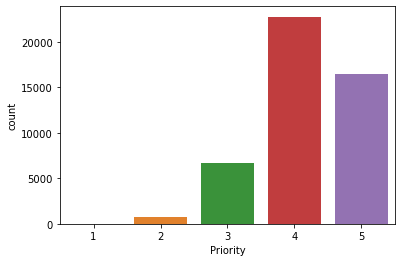

In [11]:
# countplot before merging the data
sns.countplot(data.Priority)

In [12]:
# For solving the first problem we take only the necessary features required
# SO we create a new dataframe named 'new_data'

new_data=data[['CI_Cat','CI_Subcat','Category','Priority']]


In [13]:
#Encode the cateforical values

cat_col = new_data.select_dtypes(include=object).columns
enc = LabelEncoder()
for col in (cat_col):
    new_data[col]=enc.fit_transform(new_data[col])


In [14]:
new_data[cat_col].head()

CI_Cat  CI_Subcat  Category
0      11         58         1
1       1         58         1
2       1         10         3
3       1         58         1
4       1         58         1

In [15]:
new_data.replace({'Priority':{2:1,3:1}},inplace=True)


<AxesSubplot:xlabel='Priority', ylabel='count'>

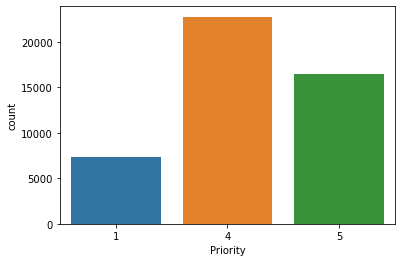

In [16]:
sns.countplot(new_data.Priority)

<AxesSubplot:>

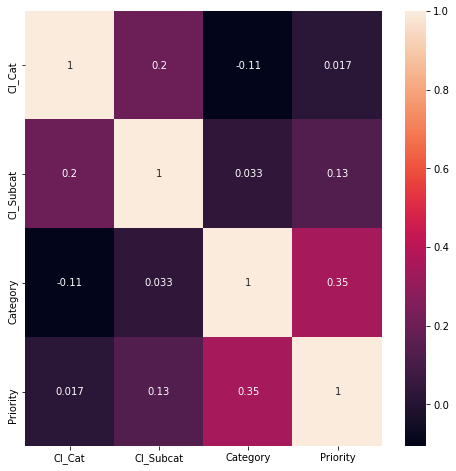

In [39]:
plt.figure(figsize=(8,8))
sns.heatmap(new_data.corr(),annot=True)

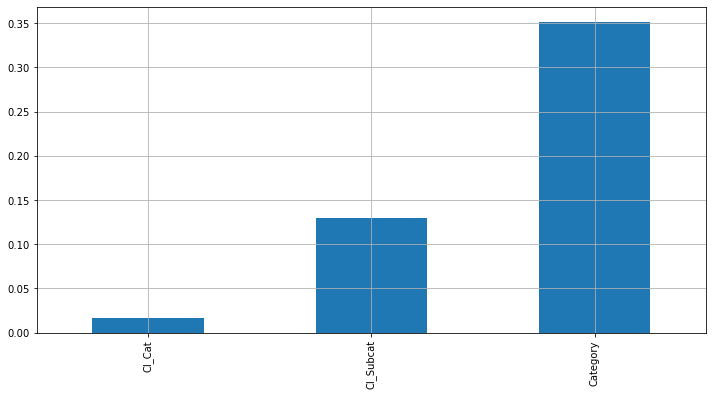

In [40]:
new_data.drop('Priority',axis=1).corrwith(new_data['Priority']).plot(kind='bar',grid=True,figsize=(12,6))
plt.show()

# Splitting into x and y

In [31]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
x = new_data.drop('Priority',axis=1)
y=new_data['Priority']



from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,auc
from sklearn.metrics import accuracy_score,recall_score,f1_score

<AxesSubplot:xlabel='Priority', ylabel='count'>

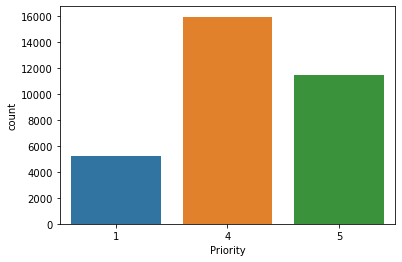

In [187]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

sns.countplot(y_train)

#### Applying Smote

In [188]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

oversample = SMOTE(random_state=42)
x_train_over,y_train_over = oversample.fit_resample(x_train.astype(float),y_train)

y_train.shape

(32624,)

In [189]:
y_train_over.value_counts()

5    15937
4    15937
1    15937
Name: Priority, dtype: int64

<AxesSubplot:xlabel='Priority', ylabel='count'>

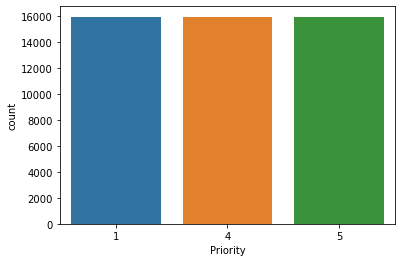

In [190]:
sns.countplot(y_train_over)

In [191]:

y_train_over=label_binarize(y_train_over,classes=[1,4,5])
y_test = label_binarize(y_test,classes=[1,4,5])
n_classes=y_train_over.shape[1]

y_train_over.shape

(47811, 3)

In [199]:
classes=[1,4,5]

In [192]:
x_train_over.head()

CI_Cat  CI_Subcat  Category
0     1.0       10.0       3.0
1     5.0       27.0       3.0
2     1.0       46.0       1.0
3     1.0       46.0       3.0
4     1.0       10.0       1.0

#### OneVsRestClassifier

In [193]:
classifier = OneVsRestClassifier(LogisticRegression()).fit(x_train_over,y_train_over)

y_score = classifier.predict(x_test)

In [200]:
print(classification_report(y_test,y_score))

              precision    recall  f1-score   support

           0       0.30      0.26      0.28      2166
           1       0.81      0.26      0.40      6812
           2       0.92      0.50      0.65      5004

   micro avg       0.71      0.35      0.47     13982
   macro avg       0.67      0.34      0.44     13982
weighted avg       0.77      0.35      0.47     13982
 samples avg       0.35      0.35      0.35     13982



##### ROC (Receiver Operating Characteristic ) Curve and AUC (Area Under the Curve ) Score

In [334]:
def predict_threshold (model,test_label,classes):
    '''
    assigns various thresholds and prints them along with confusion matrix, recall score
    accuracy score and f1 score
    
    args:
    model : estimator model
    test_label : Test (x) features
    '''
    n=len(classes)
    print('=='*10,model,'=='*10)
    for i in range(n):
        print('=='*10,'class',classes[i],'=='*10)
        for thr in np.arange(0,1.1,0.1):
            y_score=np.where(model.predict_proba(test_label)[:,i]>thr,1,0)
            print(" Threshold :",thr)
            print(confusion_matrix(y_test[:,i],y_score))
            print("\n recall score :", recall_score(y_test[:,i], y_score))
            print(' accuracy : {:0.2f}%'.format(accuracy_score(y_test[:,i],y_score)* 100))
            print(" f1 score : {:0.3f}".format(f1_score(y_test[:,i], y_score)))
            print("\n","=="*50)
        

In [202]:
predict_threshold(classifier,x_test)

==================== OneVsRestClassifier(estimator=LogisticRegression()) ====================
==================== class 1 ====================
 Threshold : 0.0
[[    0 11816]
 [    0  2166]]

 recall score : 1.0
 accuracy : 15.49%
 f1 score : 0.268

 Threshold : 0.1
[[2530 9286]
 [  42 2124]]

 recall score : 0.9806094182825484
 accuracy : 33.29%
 f1 score : 0.313

 Threshold : 0.2
[[2652 9164]
 [  61 2105]]

 recall score : 0.9718374884579871
 accuracy : 34.02%
 f1 score : 0.313

 Threshold : 0.30000000000000004
[[4713 7103]
 [ 252 1914]]

 recall score : 0.8836565096952909
 accuracy : 47.40%
 f1 score : 0.342

 Threshold : 0.4
[[9685 2131]
 [1478  688]]

 recall score : 0.31763619575253926
 accuracy : 74.19%
 f1 score : 0.276

 Threshold : 0.5
[[10462  1354]
 [ 1593   573]]

 recall score : 0.26454293628808867
 accuracy : 78.92%
 f1 score : 0.280

 Threshold : 0.6000000000000001
[[11509   307]
 [ 2148    18]]

 recall score : 0.008310249307479225
 accuracy : 82.44%
 f1 score : 0.014

In [282]:
y_score_th=np.ndarray((3,13982))
y_score_th[0]=np.where(classifier.predict_proba(x_test)[:,0]>.7,1,0)
y_score_th[1]=np.where(classifier.predict_proba(x_test)[:,1]>0.3,1,0)
y_score_th[2]=np.where(classifier.predict_proba(x_test)[:,2]>0.5,1,0)


colors = ['aqua', 'darkorange', 'cornflowerblue']
for i in range(3):
    fpr,tpr,thrs=roc_curve(y_test[:,i],classifier.predict_proba(x_test)[:,i])
    plt.plot(fpr,tpr,color=colors[i])
    fpr1, tpr1, threshold = roc_curve(y_test[:,i],y_score_th[i,:])
    score = auc(fpr1,tpr1)
    plt.plot(fpr1,tpr1,color=colors[i], marker='*', linestyle='dashed',
             linewidth=2, markersize=12,label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], score))

plt.title('ROC curve \n')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='best')
plt.show()

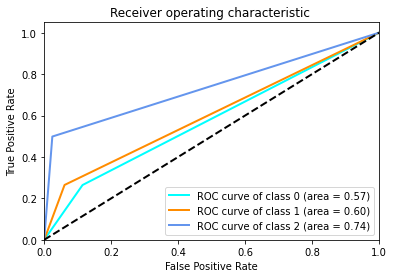

In [277]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1],'k--',lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

#### RandomForest Classifier

In [328]:
model_RFC=(RandomForestClassifier(random_state=42))
model_RFC.fit(x_train_over,y_train_over)
y_RFC = model_RFC.predict(x_test)


#print('The score for {} is {}'.format(model_RFC,model_RFC.score(x,y)))

In [329]:
print(classification_report(y_test,y_RFC))

              precision    recall  f1-score   support

           0       0.35      0.69      0.46      2166
           1       0.74      0.55      0.63      6812
           2       0.90      0.61      0.73      5004

   micro avg       0.65      0.59      0.62     13982
   macro avg       0.67      0.62      0.61     13982
weighted avg       0.74      0.59      0.64     13982
 samples avg       0.59      0.59      0.59     13982



In [333]:
predict_threshold(model_RFC,x_test)

==================== RandomForestClassifier(random_state=42) ====================
==================== class 1 ====================


TypeError: list indices must be integers or slices, not tuple

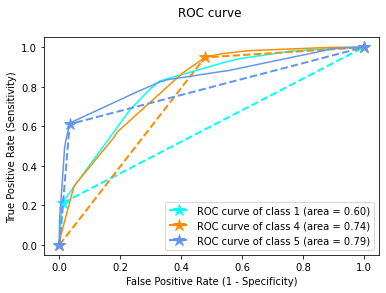

In [305]:
y_score_th=np.ndarray((3,13982))
y_score_th[0]=np.where(model_RFC.predict_proba(x_test)[:,0]>0.7,1,0)
y_score_th[1]=np.where(model_RFC.predict_proba(x_test)[:,1]>0.3,1,0)
y_score_th[2]=np.where(model_RFC.predict_proba(x_test)[:,2]>0.7,1,0)


colors = ['aqua', 'darkorange', 'cornflowerblue']
for i in range(3):
    fpr,tpr,thrs=roc_curve(y_test[:,i],model_RFC.predict_proba(x_test)[:,i])
    plt.plot(fpr,tpr,color=colors[i])
    fpr1, tpr1, threshold = roc_curve(y_test[:,i],y_score_th[i,:])
    score = auc(fpr1,tpr1)
    plt.plot(fpr1,tpr1,color=colors[i], marker='*', linestyle='dashed',
             linewidth=2, markersize=12,label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], score))

plt.title('ROC curve \n')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='best')
plt.show()

In [289]:
y_test.shape

(13982, 3)

In [314]:
for i in range(3):
    print('class {} \n\n{}\n'.format(classes[i],confusion_matrix(y_test[:,i],y_RFC[:,i])))

class 1 

[[9070 2746]
 [ 681 1485]]

class 4 

[[5865 1305]
 [3067 3745]]

class 5 

[[8653  325]
 [1933 3071]]



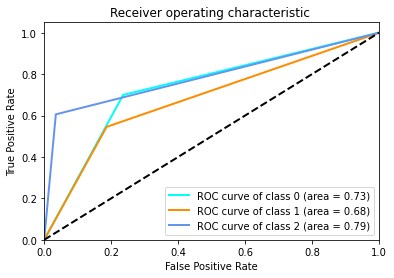

In [141]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_RFC[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1],'k--',lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

#### XGBoost Classifier

In [149]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train_over,y_train_over)
y_xgb = model_xgb.predict(x_test)

#print('The score for {} is {}'.format(model_xgb,model_xgb.score(x,y)))

ValueError: y should be a 1d array, got an array of shape (47820, 3) instead.

In [56]:
print(classification_report(y_test,y_xgb))

              precision    recall  f1-score   support

           1       0.33      0.81      0.47      2192
           4       0.73      0.55      0.63      6798
           5       0.91      0.61      0.73      4992

    accuracy                           0.62     13982
   macro avg       0.66      0.66      0.61     13982
weighted avg       0.73      0.62      0.64     13982



In [57]:
confusion_matrix(y_test,y_xgb)

array([[1784,  323,   85],
       [2800, 3772,  226],
       [ 877, 1064, 3051]])

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_xgb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1],'k--',lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

####  KNN

In [316]:
from sklearn.neighbors import KNeighborsClassifier

In [320]:
model_knn = OneVsRestClassifier(KNeighborsClassifier())
model_knn.fit(x_train_over,y_train_over)
y_knn = model_knn.predict(x_test)

#print('The score for {} is {}'.format(model_knn,model_knn.score(x,y)))

In [321]:
print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           0       0.57      0.23      0.33      2166
           1       0.65      0.93      0.76      6812
           2       0.91      0.61      0.73      5004

   micro avg       0.71      0.71      0.71     13982
   macro avg       0.71      0.59      0.61     13982
weighted avg       0.73      0.71      0.68     13982
 samples avg       0.71      0.71      0.71     13982



In [322]:
predict_threshold(model_knn,x_test)

==================== OneVsRestClassifier(estimator=KNeighborsClassifier()) ====================
==================== class 1 ====================
 Threshold : 0.0
[[3756 8060]
 [ 313 1853]]

 recall score : 0.855493998153278
 accuracy : 40.12%
 f1 score : 0.307

 Threshold : 0.1
[[3756 8060]
 [ 313 1853]]

 recall score : 0.855493998153278
 accuracy : 40.12%
 f1 score : 0.307

 Threshold : 0.2
[[8752 3064]
 [ 640 1526]]

 recall score : 0.7045244690674054
 accuracy : 73.51%
 f1 score : 0.452

 Threshold : 0.30000000000000004
[[8752 3064]
 [ 640 1526]]

 recall score : 0.7045244690674054
 accuracy : 73.51%
 f1 score : 0.452

 Threshold : 0.4
[[11445   371]
 [ 1668   498]]

 recall score : 0.2299168975069252
 accuracy : 85.42%
 f1 score : 0.328

 Threshold : 0.5
[[11445   371]
 [ 1668   498]]

 recall score : 0.2299168975069252
 accuracy : 85.42%
 f1 score : 0.328

 Threshold : 0.6000000000000001
[[11597   219]
 [ 1681   485]]

 recall score : 0.22391505078485688
 accuracy : 86.41%
 f1 s

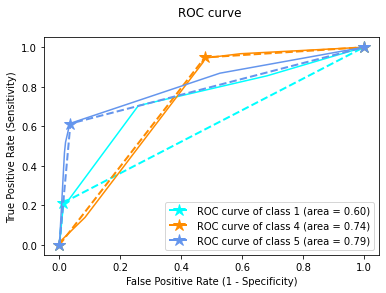

In [327]:
y_score_th=np.ndarray((3,13982))
y_score_th[0]=np.where(model_RFC.predict_proba(x_test)[:,0]>0.7,1,0)
y_score_th[1]=np.where(model_RFC.predict_proba(x_test)[:,1]>0.3,1,0)
y_score_th[2]=np.where(model_RFC.predict_proba(x_test)[:,2]>0.5,1,0)


colors = ['aqua', 'darkorange', 'cornflowerblue']
for i in range(3):
    fpr,tpr,thrs=roc_curve(y_test[:,i],model_knn.predict_proba(x_test)[:,i])
    plt.plot(fpr,tpr,color=colors[i])
    fpr1, tpr1, threshold = roc_curve(y_test[:,i],y_score_th[i,:])
    score = auc(fpr1,tpr1)
    plt.plot(fpr1,tpr1,color=colors[i], marker='*', linestyle='dashed',
             linewidth=2, markersize=12,label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], score))

plt.title('ROC curve \n')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='best')
plt.show()

In [61]:
confusion_matrix(y_test,y_knn)

array([[1558,  540,   94],
       [2355, 4224,  219],
       [ 643, 1308, 3041]])

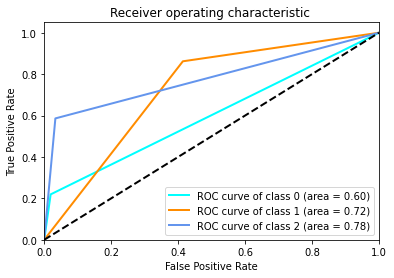

In [154]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1],'k--',lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

### Applying CV

In [62]:
from sklearn.model_selection import cross_val_score

####===================== Random Forest======================#####

RF = RandomForestClassifier(random_state=100)
RF.fit(x,y)

RFC_acc = cross_val_score(estimator=RF,X=x,y=y,cv= 8,scoring='accuracy')
rfc=[RFC_acc.mean(), RFC_acc.std()]

#####========================== XGBoost =============================####

XGB = XGBClassifier()
XGB.fit(x,y)

XGB_acc = cross_val_score(estimator= XGB,X= x,y=y,cv=8,scoring='accuracy')
xgb = [XGB_acc.mean(), XGB_acc.std()]

#####=================================KNN=============================####

KNC = KNeighborsClassifier()
KNC.fit(x,y)

KNC_acc = cross_val_score(estimator=KNC,X=x,y=y ,cv=8,scoring='accuracy')
kn=[KNC_acc.mean(), KNC_acc.std()]

####===========Summary of all the mean and standard deviations of the accuracies============######

cvs = {'model':['Random','XGB','KNN'],
      'Accuracy mean':[(rfc[0]),(xgb[0]),(kn[0])],
      'Accuracy std':[rfc[1],xgb[1],kn[1]]
      }

pd.DataFrame(cvs)

[15:46:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

model  Accuracy mean  Accuracy std
0  Random       0.713169      0.009707
1     XGB       0.713277      0.009961
2     KNN       0.652296      0.064995

In [65]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

def evaluate(model, test_features, test_labels):
    '''
    Returns the accuracy of the model.
    Also calculates the average error of the estimator model passed.
    
    '''
    predictions = model.predict(test_features)
    errors = abs(predictions-test_labels).astype(float)
    accuracy = accuracy_score(test_labels,predictions)
    mean_error = np.mean(errors)
    print('=='*10,' Model Performance ','=='*10)
    print('Average Error:{}'.format(mean_error))
    print('Accuracy = {:0.4f}.'.format(accuracy))
    
    return accuracy



def improvement(base,tuned):
    '''
    Returns the improvement in accuracy from different models
    
    '''
    impr =  100 * ((tuned - base) / base)
    return impr



In [ ]:
n_estimators = [ x for x in np.arange(50,500,50)]
max_depth = [x for x in np.arange(2,15,2)]
min_samples_split = [x for x in np.arange(1,10,1)]
max_features = ['auto','log2',None]
random_state=[x for x in np.arange(0,500,10)]

param_random = {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'max_features':max_features,
    'random_state':random_state
}

# RandomSearch Training

RFC1 = RandomForestClassifier()

# Random search of parameters

RFC_random = RandomizedSearchCV(RFC1, param_random , n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1,scoring='accuracy',return_train_score=True)
RFC_random.fit(x_train_over,y_train_over)

In [68]:
print('The best parameters from randomsearch :',RFC_random.best_params_)

# Initialising and fitting the base model

base_model = RandomForestClassifier()
base_model.fit(x_train_over, y_train_over)

The best parameters from randomsearch : {'random_state': 110, 'n_estimators': 150, 'min_samples_split': 6, 'max_features': None, 'max_depth': 12}


RandomForestClassifier()

In [66]:
base_accuracy = evaluate(base_model,x_test, y_test)

#print(accuaracy(y_test,y_predict_th2))

====================  Model Performance  ====================
Average Error:1.0371191531969675
Accuracy = 0.6156.


In [67]:
# Evaluate the best found estimator

best_random = RFC_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)

print('Improvement of {:0.2f}% in accuracy using Randomized Search for XGB from base model.'.format( improvement(base_accuracy,random_accuracy)))

====================  Model Performance  ====================
Average Error:1.0373337147761408
Accuracy = 0.6156.
Improvement of 0.00% in accuracy using Randomized Search for XGB from base model.


In [70]:
# Create the parameter grid based on the results of random search 

param_grids = {
    'n_estimators':[50,150],
    'max_depth': [10,12,14],
    'min_samples_split':[5,6,7],
    'random_state':[110],
    'max_features':[None]
}



# Create a based model
RFC2 = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RFC2, param_grid = param_grids,cv = 5, n_jobs = -1, verbose = 2,scoring= 'accuracy',return_train_score=True)

# Fit the grid search to the data
grid_search.fit(x_train_over, y_train_over)





print('The best parameters from gridsearchcv : ',grid_search.best_params_)

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)

print('Improvement of {:0.2f}% in accuracy using Grid search CV for RFC from base model.'.format( improvement(base_accuracy,grid_accuracy)))

print('Improvement of {:0.2f}% in accuracy from Randomized to Grid search CV for RFC.'.format( improvement(random_accuracy,grid_accuracy)))

print('The best estimator : ',best_grid)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
The best parameters from gridsearchcv :  {'max_depth': 12, 'max_features': None, 'min_samples_split': 6, 'n_estimators': 150, 'random_state': 110}
====================  Model Performance  ====================
Average Error:1.0373337147761408
Accuracy = 0.6156.
Improvement of 0.00% in accuracy using Grid search CV for RFC from base model.
Improvement of 0.00% in accuracy from Randomized to Grid search CV for RFC.
The best estimator :  RandomForestClassifier(max_depth=12, max_features=None, min_samples_split=6,
                       n_estimators=150, random_state=110)
